In [38]:
# Importing the initial required libraries
import pandas as pd
import numpy as np # math library
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split 

# importing the model
from sklearn.linear_model import LinearRegression

# metrics from sklearn contains all the performance evaluation metrics
from sklearn import metrics 

In [39]:
# Load in the data
url = "https://bit.ly/316tYZT" # replace with your dataset link/path
df = pd.read_csv(url)
df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2,215000
1,11622,5,6,1961,1961,896,1,2,0,1,105000
2,14267,6,6,1958,1958,1329,1,3,0,1,172000
3,11160,7,5,1968,1968,2110,2,3,2,2,244000
4,13830,5,5,1997,1998,1629,2,3,1,2,189900


In [40]:
# Different basic EDA steps

print("Dimension of the data:", df.shape) # returns number of rows, column 

print("\n", "--" * 50, "\n") # just adds a new line and a visual separator line to make outputs readable

print("Summary of the data\n")
display(df.info()) # quick summary insights with data types and data completeness

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum()) # display mainly renders richer formatted outputs & flexible to render multiple outputs in single cell

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe()) # summary of key statistics


Dimension of the data: (2925, 11)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  SalePrice       2925 non-null   int64
dtypes: int64(11)
memory usage: 251.5 KB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [41]:
# Correlation matrix
df.corr()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
Lot Area,1.000000,0.083256,-0.032795,0.017049,0.015887,0.258529,0.121394,0.138169,0.247698,0.176047,0.270047
Overall Qual,0.083256,1.000000,-0.093902,0.596621,0.569498,0.564797,0.518713,0.061772,0.387174,0.598127,0.805236
Overall Cond,-0.032795,-0.093902,1.000000,-0.368533,0.048356,-0.116169,-0.214322,-0.006207,-0.030648,-0.181384,-0.103296
Year Built,0.017049,0.596621,-0.368533,1.000000,0.611444,0.239305,0.468485,-0.055650,0.167803,0.537146,0.565110
Year Remod/Add,0.015887,0.569498,0.048356,0.611444,1.000000,0.318860,0.456708,-0.021801,0.130699,0.423511,0.540290
Gr Liv Area,0.258529,0.564797,-0.116169,0.239305,0.318860,1.000000,0.637511,0.534222,0.449018,0.493222,0.719463
Full Bath,0.121394,0.518713,-0.214322,0.468485,0.456708,0.637511,1.000000,0.358727,0.225748,0.474841,0.544486
Bedroom AbvGr,0.138169,0.061772,-0.006207,-0.055650,-0.021801,0.534222,0.358727,1.000000,0.075856,0.090296,0.139766
Fireplaces,0.247698,0.387174,-0.030648,0.167803,0.130699,0.449018,0.225748,0.075856,1.000000,0.319385,0.474878
Garage Cars,0.176047,0.598127,-0.181384,0.537146,0.423511,0.493222,0.474841,0.090296,0.319385,1.000000,0.652227


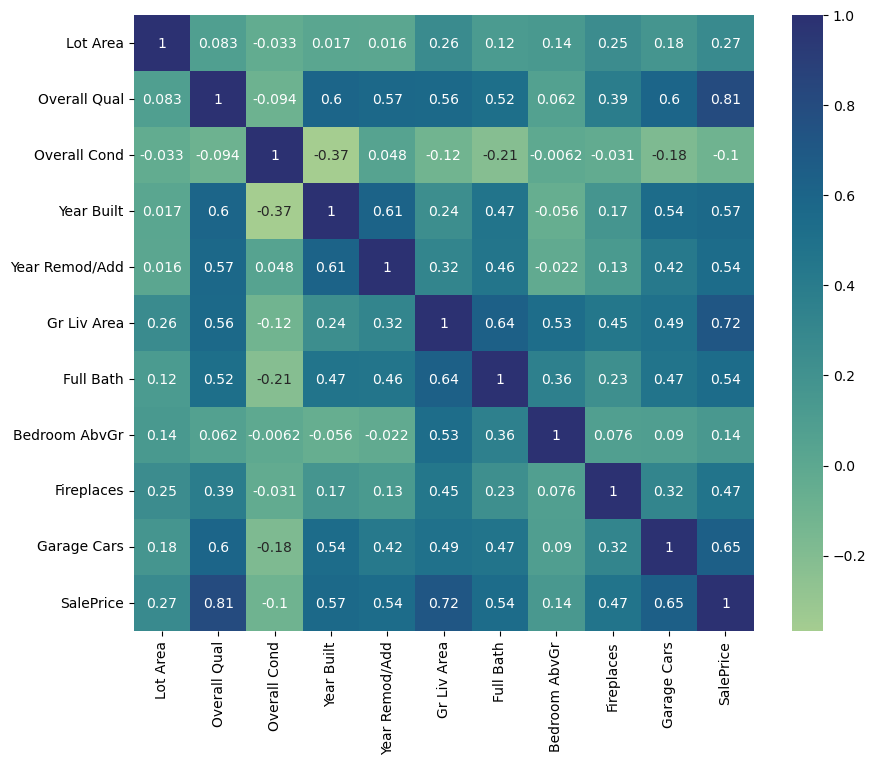

In [42]:
# Let's plot the correlation matrix as a heatmap

plt.figure(figsize = (10,8)) # set figure size
sns.heatmap(df.corr(), annot = True, cmap = "crest"); # plot heatmap for field correlations with annotation

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
Lot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Qual,NaN,NaN,NaN,0.596621,0.569498,0.564797,0.518713,NaN,NaN,0.598127,0.805236
Overall Cond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Built,NaN,0.596621,NaN,NaN,0.611444,NaN,NaN,NaN,NaN,0.537146,0.565110
Year Remod/Add,NaN,0.569498,NaN,0.611444,NaN,NaN,NaN,NaN,NaN,NaN,0.540290
Gr Liv Area,NaN,0.564797,NaN,NaN,NaN,NaN,0.637511,0.534222,NaN,NaN,0.719463
Full Bath,NaN,0.518713,NaN,NaN,NaN,0.637511,NaN,NaN,NaN,NaN,0.544486
Bedroom AbvGr,NaN,NaN,NaN,NaN,NaN,0.534222,NaN,NaN,NaN,NaN,NaN
Fireplaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cars,NaN,0.598127,NaN,0.537146,NaN,NaN,NaN,NaN,NaN,NaN,0.652227


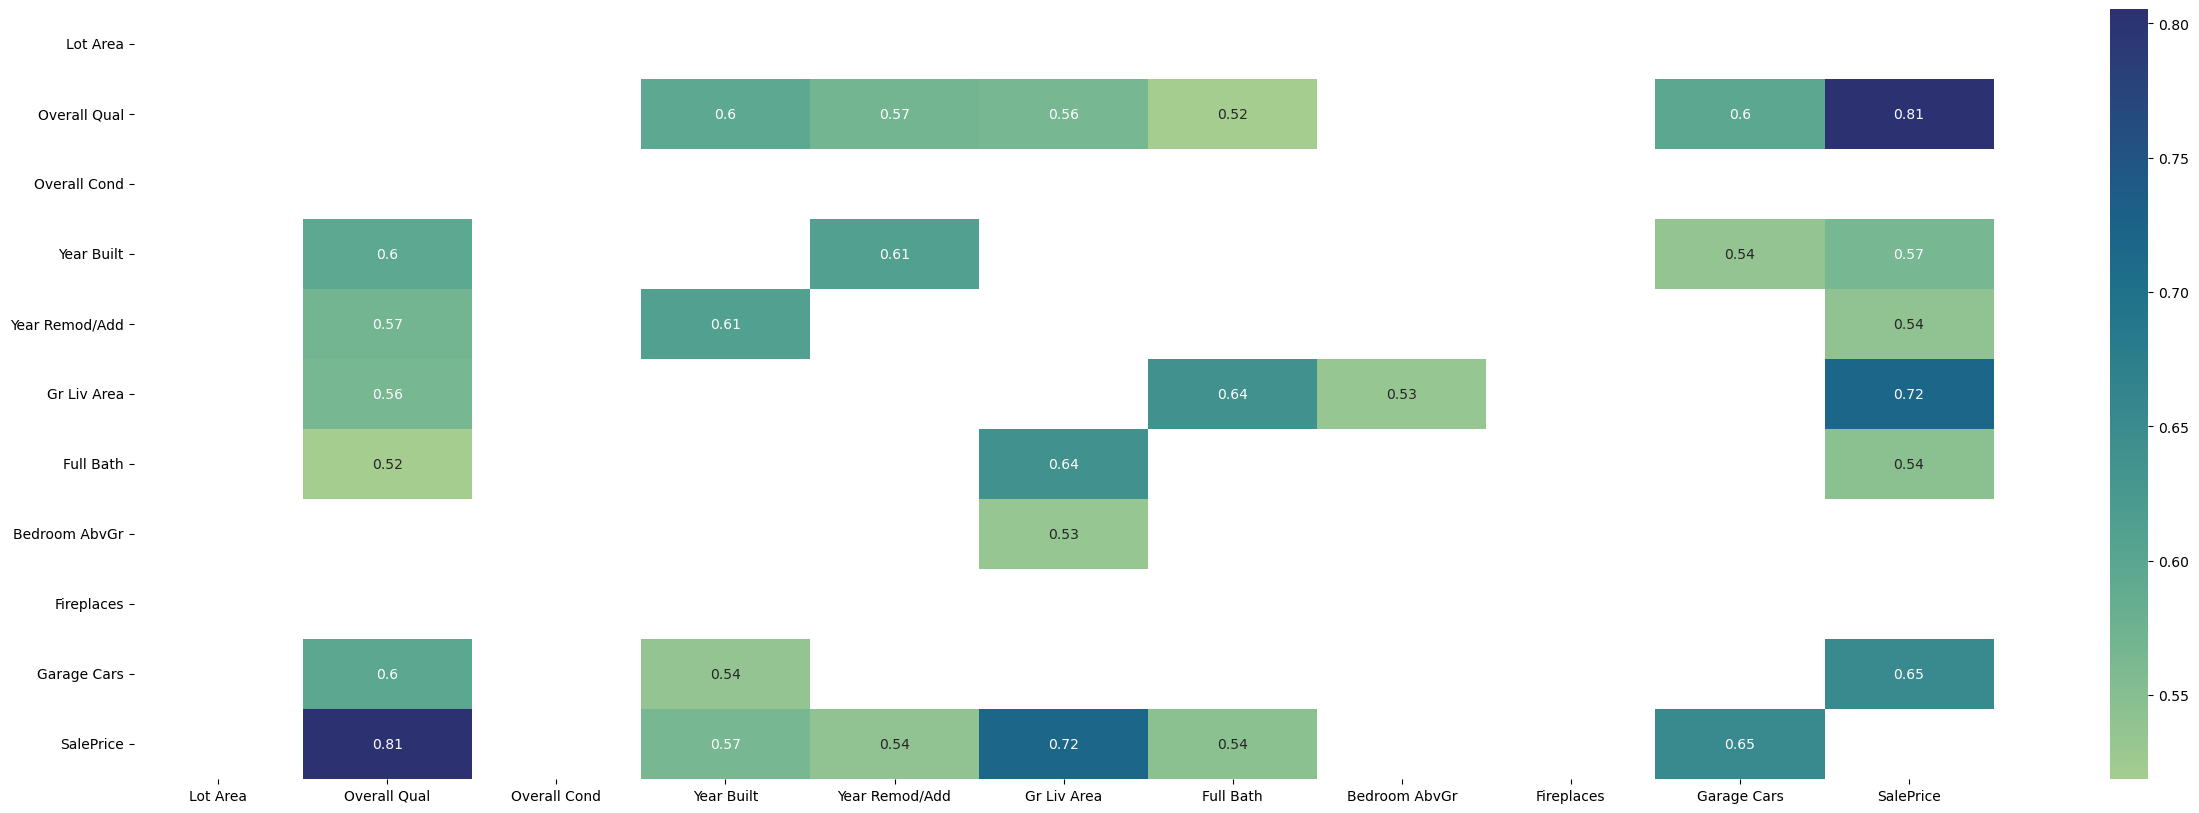

In [43]:
# Visualize only high correlations
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr > 0.5) | (dfCorr < -0.5)) & (dfCorr !=1.000)]
display(filteredDf)

plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="crest")
plt.show()

In [44]:
X = df.drop('SalePrice', axis=1) # take ALL feature columns except target column. replace target col based on your data
# alternative selective features selection (if running below, comment above with # and remove # from below)
#X = df[['Feature1', 'Feature2'...]] # replace Feature1, Feature2..with actual feature col names from your data
y = df[['SalePrice']] # target to predict. replace target col based on your data

In [45]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# Printing some rows of split data
display(X_train[0:5])
display(y_train[0:4])
display(X_test[0:4])
display(y_test[0:4])

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
1407,19550,5,7,1940,2007,1518,1,2,2,0
1227,7584,5,5,1953,1953,1036,1,3,0,1
313,12760,6,5,1976,1976,2048,3,5,0,2
2269,15306,8,5,2006,2007,1776,2,3,1,3
1767,9950,7,5,1995,1995,2520,2,4,1,3


,SalePrice
1407,260000
1227,112900
313,170000
2269,283463


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
407,1680,5,7,1972,1972,1302,2,3,0,1
1012,15401,9,5,2004,2004,1884,2,2,1,3
1429,11500,6,6,1966,1966,1643,2,2,1,2
705,6000,5,7,1950,1970,1328,1,3,0,1


,SalePrice
407,119500
1012,387000
1429,195000
705,129500


In [47]:
# instantiating the model

mlr_model = LinearRegression()  # similar code, just giving a different name to the model

In [48]:
# fit() is used to pass training data to train the model

mlr_model.fit(X_train, y_train)

LinearRegression()

### Model Prediction

In [50]:
# Predicting the values for testing inputs

y_pred = mlr_model.predict(X_test)

##### Average error

In [52]:
# Finding mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

24918.782725581797

It indicates that on an average, if the model predicts a price of a house based on overall quality, there may be an error of the value that appears above.

##### Model's accuracy

In [55]:
accuracy_mlr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")

Accuracy of the model is: 80 %


In [56]:
# printing y intercept 
mlr_model.intercept_

array([-1340069.84581312])

In [57]:
# printing slope of dependent variable 
mlr_model.coef_

array([[ 1.13355833e+00,  1.99625789e+04,  4.77581430e+03,
         5.16053572e+02,  1.30026584e+02,  7.65612354e+01,
        -9.63784135e+03, -1.23345258e+04,  6.01428178e+03,
         1.01358187e+04]])